In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('../KaggleforHeart/heart.csv')

In [4]:
# print first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
#统计不患有心脏病和有可能患有心脏病的人群数
# healthy = df[(df['target']==0)].count([1])
healthy = df[(df['target']==0)].count()[1]
sick = df[(df['target']==1)].count()[1]
print('num of people without heart disease:'+str(healthy))
print('num of people with chance for heart disease:'+str(sick))

num of people without heart disease:138
num of people with chance for heart disease:165


In [7]:
#对数据进行计数，然后将其分为测试集和训练集
#将数据分为30-70，因为数据量比较小，需要足够的验证实例。
# 数据分配到x，标签分配到y

X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

In [8]:
#
X_std = StandardScaler().fit_transform(X)

In [9]:
dfNorm = pd.DataFrame(X_std,index=df.index,columns=df.columns[0:13])

In [10]:
# add non-feature target column to dataframe
dfNorm['target'] = df['target']
dfNorm.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,1
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,1
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,1
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,1
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,1


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((212, 13), (212,), (91, 13), (91,))

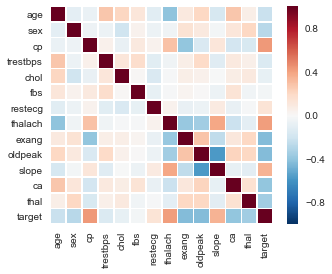

In [13]:
%matplotlib inline
# 计算相关性矩阵
corr = dfNorm.corr()
# 画出热力图
fig = plt.figure(figsize=(5,4))
# sns.heatmap(corr,
#             xticklabels=corr.columns,
#             yticklabels=corr.columns,
#                 linewidths = .75)

sns.heatmap(corr, 
        xticklabels=True,
        yticklabels=True,
            linewidths=.75)

In [14]:
#helping functions

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def sfs_features(algo_namem,features_nums):
    sfs_name = SFS(algo_namem,k_features=features_nums,
                   forward=True,floating=False,
                   scoring='accuracy',
                   cv=5)
    return sfs_name

In [16]:
results_test = {}
results_train = {}
list_algos = []

In [35]:
def prdict_data(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train,y_train)
    Y_pred = algo_name.predict(X_test)
#     acc_train = round(algo_name.score(X_train,y_train)*100,2)
#     acc_val = round(algo_name,score(X_test,y_test)*100,2)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)]=acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)]=acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('()')])
    if verbose ==0:
        print("acc train:"+str(acc_train))
        print("acc test:"+str(acc_val))
    else:
        return Y_pred

In [36]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a = (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose == 0:
        print('Selected features:',sfs_name.k_feature_idx_)
        for i in range(len(sfs_name.k_feature_idx_)):
            print(df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [37]:
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
  # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_spilts=cvn)
    classifier = alo_name
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    
    i = 0
    for train,test in cv.spilt(X,y):
        probas_ = classifier.fit(X[train],y[train].ravel()).predict_proba(X[test])
        # computer ROC curve and area the curve
        fpr,tpr,thresholds = roc_curve(y[test].ravel(),probas_[:,1])
        tprs.append(interp(mean_fpr,fpr,fpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr,tpr)
        aucs.append(roc_auc)
        plt.plot(fpr,tpr,lw=1,alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i,roc_auc))
        
        i += 1
    
    plt.plot([0,1],[0,1],linestyle='--',lw=2,color='r',
            label='Luck',alpha=.8)
    
    std_tpr = np.std(tprs,axis=0)
    tprs_upper = np.minimum(mean_fpr+std_tpr,1)
    tprs_lower = np.maximum(mean_fpr-std_tpr,0)
    plt.fill_between(mean_fpr,tprs_lower,tprs_upper,color='grey',alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
### helping function

def conf(algo_name,X_test,y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred,y_test,[1,0])
    sns.heatmap(forest_cm,annot=True,fmt='.2f',xticklabels=["1","0"],yticklabels=["1","0"])
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('()')])

### PCA
> Principal component analysisi(PCA) is a technique used to emphasize variation and bring  out strong patterns in a dataset

we use it first make data easy to explore and visualize

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

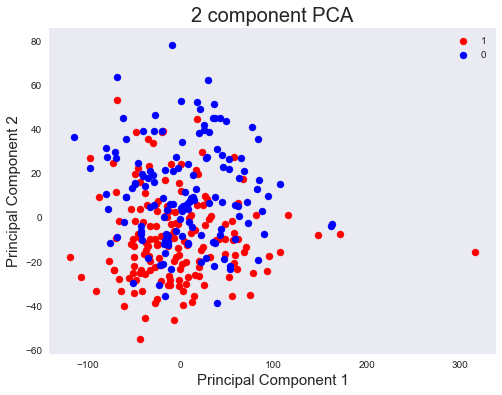

In [40]:
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)    
ax.set_title('2 component PCA',fontsize = 20)
targets = [1,0]
colors = ['r','b']
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
              finalDf.loc[indicesToKeep,'principal component 2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()

#### Define the Algorithms

first we will run each algorithm on all the features
then we will use SFS to comphere and check improvment, we will use sfs to take automaticly from 1 to 5 features as the algorithm subjects

In [41]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [42]:
prdict_data(lda,X_train,y_train,X_test,y_test)
# help LinearDiscriminantAnalysis

acc train:85.38
acc test:80.22


In [45]:
# predicting using sfs:
sfs_1 = sfs_features(lda,(1,13))
sfs_1 = sfs_1.fit(X,y)
selectedFeatures = print_fitures(sfs_1)

Selected features: (2, 5, 7, 8, 9, 11, 12)
cp
fbs
thalach
exang
oldpeak
ca
thal


In [47]:
X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print('\n')
prdict_data(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')



acc train:84.91
acc test:81.32


             precision    recall  f1-score   support

          0       0.91      0.68      0.78        44
          1       0.76      0.94      0.84        47

avg / total       0.83      0.81      0.81        91



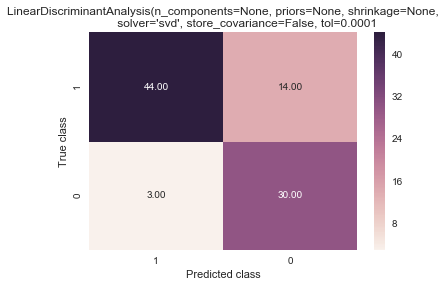

In [48]:
print(classification_report(y_test,lda.predict(X_test_sfs)))
conf(lda,X_test_sfs,y_test)